In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline
import os
import wrangle
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
#sklearn stuff 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from scipy import stats
import utilities
import warnings
warnings.filterwarnings("ignore")


# Modeling

In [5]:
df = wrangle.get_terrorism_data()

In [6]:
df = wrangle.prep_df(df)

In [7]:
cols_to_drop =['eventid',
 'year',
 'month',
 'day',
 'country',
 'region',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'success',
 'suicide',
 'attack_type',
 'targ_desc',
 'targeted_group',
 'tg_desc',
 'nationality',
 'atk_group',
 'claimed',
 'weap_type',
 'weap_sub',
 'killed',
 'us_killed',
 'ter_killed',
 'wounded',
 'us_wounded',
 'ter_wounded',
 'property']

In [127]:
df3 = df.drop(cols_to_drop, axis = 1)

In [158]:
df3 = df3.replace(['educational institution'], 'other')
df3 = df3.replace(['religious figures/institutions'], 'other')
df3 = df3.replace(['transportation'], 'other')
df3 = df3.replace(['utilities'], 'other')
df3 = df3.replace(['government (diplomatic)'], 'other')
df3 = df3.replace(['violent political party'], 'other')
df3 = df3.replace(['journalists & media'], 'other')
df3 = df3.replace(['ngo'], 'other')
df3 = df3.replace(['airports & aircraft'], 'other')
df3 = df3.replace(['telecommunication'], 'other')
df3 = df3.replace(['food or water supply'], 'other')
df3 = df3.replace(['tourists'], 'other')
df3 = df3.replace(['maritime'], 'other')
df3 = df3.replace(['terrorists/non-state militia'], 'other')
df3 = df3.replace(['business'], 'other')

In [118]:
df2_trial = df2.copy()

In [160]:
df2_trial = df2_trial.drop(columns = 'target')

In [161]:
df2_trial = pd.concat([df2_trial, df3], axis=1)

In [162]:
df3.target.value_counts()

private citizens & property    12194
other                          10402
police                          8866
military                        8011
government (general)            4836
Name: target, dtype: int64

In [145]:
df2_trial

,eventid,year,month,day,country,region,provstate,city,latitude,longitude,...,weap_type,weap_sub,killed,us_killed,ter_killed,wounded,us_wounded,ter_wounded,property,target
0,200101010004,2001,1,1,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,explosives,pipe bomb,0.0,0.0,0.0,10.0,0.0,0.0,1,private citizens & property
1,200101030001,2001,1,3,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,explosives,suicide (carried bodily by human being),3.0,0.0,1.0,7.0,0.0,0.0,1,police
3,200101070003,2001,1,7,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,firearms,unknown gun type,0.0,0.0,0.0,1.0,0.0,0.0,1,police
6,200101080002,2001,1,8,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,other,knife or other sharp object,0.0,0.0,0.0,1.0,0.0,0.0,0,educational institution
7,200101100004,2001,1,10,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,firearms,unknown gun type,1.0,0.0,0.0,1.0,0.0,0.0,1,police
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,201712310013,2017,12,31,somalia,sub-saharan africa,bakool,other,3.810951,43.246506,...,explosives,"projectile (rockets, mortars, rpgs, etc.)",0.0,0.0,0.0,0.0,0.0,0.0,-9,military
62720,201712310018,2017,12,31,afghanistan,south asia,faryab,other,35.315467,64.815508,...,firearms,unknown gun type,6.0,0.0,0.0,0.0,0.0,0.0,0,terrorists/non-state militia
62721,201712310020,2017,12,31,afghanistan,south asia,faryab,other,35.921051,64.774544,...,explosives,unknown explosive type,0.0,0.0,0.0,4.0,0.0,0.0,1,business
62722,201712310022,2017,12,31,somalia,sub-saharan africa,middle shebelle,other,2.359673,45.385034,...,firearms,unknown gun type,1.0,0.0,0.0,2.0,0.0,0.0,-9,military


In [163]:
df2_trial['attack_type'] = df2_trial.attack_type.replace(['hijacking'], 'other') 
df2_trial['attack_type'] = df2_trial.attack_type.replace(['unarmed assault'], 'other') 
df2_trial['attack_type'] = df2_trial.attack_type.replace(['hostage taking (barricade incident)'], 'other') 
df2_trial['attack_type'] = df2_trial.attack_type.replace(['facility/infrastructure attack'], 'other') 
df2_trial['attack_type'] = df2_trial.attack_type.replace(['hostage taking (kidnapping)'], 'other') 
df2_trial['country'] = df2_trial.country.replace(['turkey'], 'other')
df2_trial['country'] = df2_trial.country.replace(['syria'], 'other')
df2_trial['country'] = df2_trial.country.replace(['israel'], 'other')
df2_trial['country'] = df2_trial.country.replace(['sudan'], 'other')
df2_trial['country'] = df2_trial.country.replace(['lebanon'], 'other')
df2_trial['country'] = df2_trial.country.replace(['saudi arabia'], 'other')
df2_trial['country'] = df2_trial.country.replace(['bahrain'], 'other')
df2_trial['country'] = df2_trial.country.replace(['iran'], 'other')
df2_trial['country'] = df2_trial.country.replace(['jordan'], 'other')
df2_trial['country'] = df2_trial.country.replace(['kuwait'], 'other')
df2_trial['country'] = df2_trial.country.replace(['qatar'], 'other')
df2_trial['country'] = df2_trial.country.replace(['djibouti'], 'other')
df2_trial['weap_type'] = df2_trial.weap_type.replace(['melee'], 'other')
df2_trial['weap_type'] = df2_trial.weap_type.replace(['chemical'], 'other')

In [134]:
bottom = df2_trial.nationality.value_counts().index.to_list()
bottom = bottom[10:]
df2_trial.nationality = df2_trial.nationality.replace(bottom, 'other')

In [135]:
bottom_city = df2_trial.city.value_counts().index.to_list()
bottom_city = bottom_city[25:]
df2_trial.city = df2_trial.city.replace(bottom_city, 'other')

In [164]:
df2_trial.year = df2_trial.year.astype('str')

In [165]:
df2_trial_keep = df2_trial[['target','atk_group', 'weap_sub','attack_type','suicide', 'month', 'country', 'provstate', 'year', 'weap_type', 'nationality', 'city']]

In [166]:
df2_trial.target.value_counts()

private citizens & property    12194
other                          10402
police                          8866
military                        8011
government (general)            4836
Name: target, dtype: int64

In [168]:
encoded_df = pd.get_dummies(df2_trial[['attack_type','suicide', 'month', 'country', 'provstate', 'year', 'weap_type', 'nationality', 'city']], dummy_na=False, drop_first=[True, True])

In [169]:
df2 = pd.concat([df3, encoded_df], axis = 1)

In [170]:
df2

,target,suicide,month,attack_type_assassination,attack_type_bombing/explosion,attack_type_other,country_egypt,country_iraq,country_other,country_pakistan,...,city_other,city_peshawar,city_quetta,city_ramadi,city_samarra,city_sheikh zuweid,city_tarmiyah,city_tikrit,city_tuz khormato,city_unknown
0,private citizens & property,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,police,1,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,police,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
6,other,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,police,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,military,0,12,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
62720,other,0,12,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
62721,other,0,12,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
62722,military,0,12,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [171]:
df2_trial_keep.target.value_counts()

private citizens & property    12194
other                          10402
police                          8866
military                        8011
government (general)            4836
Name: target, dtype: int64

In [172]:
df2_trial

,eventid,year,month,day,country,region,provstate,city,latitude,longitude,...,weap_type,weap_sub,killed,us_killed,ter_killed,wounded,us_wounded,ter_wounded,property,target
0,200101010004,2001,1,1,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,explosives,pipe bomb,0.0,0.0,0.0,10.0,0.0,0.0,1,private citizens & property
1,200101030001,2001,1,3,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,explosives,suicide (carried bodily by human being),3.0,0.0,1.0,7.0,0.0,0.0,1,police
3,200101070003,2001,1,7,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,firearms,unknown gun type,0.0,0.0,0.0,1.0,0.0,0.0,1,police
6,200101080002,2001,1,8,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,other,knife or other sharp object,0.0,0.0,0.0,1.0,0.0,0.0,0,other
7,200101100004,2001,1,10,other,middle east & north africa,istanbul,other,41.106178,28.689863,...,firearms,unknown gun type,1.0,0.0,0.0,1.0,0.0,0.0,1,police
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,201712310013,2017,12,31,somalia,sub-saharan africa,bakool,other,3.810951,43.246506,...,explosives,"projectile (rockets, mortars, rpgs, etc.)",0.0,0.0,0.0,0.0,0.0,0.0,-9,military
62720,201712310018,2017,12,31,afghanistan,south asia,faryab,other,35.315467,64.815508,...,firearms,unknown gun type,6.0,0.0,0.0,0.0,0.0,0.0,0,other
62721,201712310020,2017,12,31,afghanistan,south asia,faryab,other,35.921051,64.774544,...,explosives,unknown explosive type,0.0,0.0,0.0,4.0,0.0,0.0,1,other
62722,201712310022,2017,12,31,somalia,sub-saharan africa,middle shebelle,other,2.359673,45.385034,...,firearms,unknown gun type,1.0,0.0,0.0,2.0,0.0,0.0,-9,military


In [179]:
cluster_data = df2_trial_keep
cluster_data = cluster_data.drop(columns={'target'})

In [180]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 268628.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 268628.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 268628.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 268628.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 268628.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9733, cost: 240541.0
Run 1, iteration: 2/100, moves: 3509, cost: 240541.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 12093, cost: 232656.0
Run 2, i

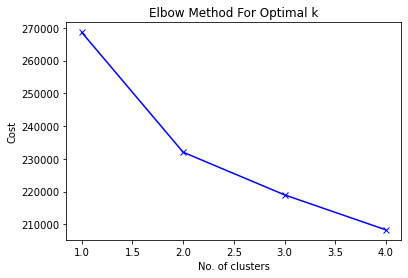

In [181]:
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [182]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(cluster_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9352, cost: 227192.0
Run 1, iteration: 2/100, moves: 7577, cost: 218603.0
Run 1, iteration: 3/100, moves: 3125, cost: 218603.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 8030, cost: 236422.0
Run 2, iteration: 2/100, moves: 7289, cost: 225050.0
Run 2, iteration: 3/100, moves: 6678, cost: 225050.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 8895, cost: 235176.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8287, cost: 227812.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 8501, cost: 222922.0
Best run was number 1


array([0, 0, 1, ..., 0, 1, 0], dtype=uint16)

In [183]:
data = cluster_data.copy()
data.insert(0, "Cluster", clusters, True)
data

,Cluster,atk_group,weap_sub,attack_type,suicide,month,country,provstate,year,weap_type,nationality,city
0,0,unknown,pipe bomb,bombing/explosion,0,1,other,istanbul,2001,explosives,turkey,other
1,0,devrimici halk kurtulus cephesi (dhkp/c),suicide (carried bodily by human being),bombing/explosion,1,1,other,istanbul,2001,explosives,turkey,other
3,1,devrimici halk kurtulus cephesi (dhkp/c),unknown gun type,armed assault,0,1,other,istanbul,2001,firearms,turkey,other
6,1,great eastern islamic raiders front (ibda-c),knife or other sharp object,armed assault,0,1,other,istanbul,2001,other,turkey,other
7,1,unknown,unknown gun type,armed assault,0,1,other,istanbul,2001,firearms,turkey,other
...,...,...,...,...,...,...,...,...,...,...,...,...
62719,0,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,bakool,2017,explosives,international,other
62720,2,taliban,unknown gun type,armed assault,0,12,afghanistan,faryab,2017,firearms,afghanistan,other
62721,0,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,faryab,2017,explosives,afghanistan,other
62722,1,al-shabaab,unknown gun type,armed assault,0,12,somalia,middle shebelle,2017,firearms,somalia,other


In [188]:
data.city.to_list()

['other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'kabul',
 'unknown',
 'other',
 'other',
 'other',
 'other',
 'karachi',
 'other',
 'kabul',
 'kabul',
 'kabul',
 'karachi',
 'other',
 'other',
 'kabul',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'karachi',
 'quetta',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'jalalabad',
 'baghdad',
 'kabul',
 'other',
 'other',
 'mogadishu',
 'karachi',
 'karachi',
 'other',
 'other',
 'other',
 'other',
 'mogadishu',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'karachi',
 'other',
 'other',
 'other',
 'karachi',
 'other',
 'other',
 'other',
 'other',
 'other',
 'karachi',
 'other',
 'karachi',
 'other',
 'other',
 'baghdad',
 'other',
 'karachi',
 'other',
 'other',
 'karachi',
 'other',
 'karachi',
 'other',
 'other

In [184]:
dummy_df = pd.get_dummies(data[['Cluster',
                               'provstate',
                               'city',
                              'nationality',
                              'month',
                              'attack_type',
                              'atk_group', 
                              'weap_type',
                              'weap_sub']], dummy_na=False, drop_first=[True, True])
df_trial2 = pd.concat([df3, dummy_df], axis = 1)

In [186]:
df_trial2.columns.to_list()

['target',
 'Cluster',
 'month',
 'provstate_adiyaman',
 'provstate_agri',
 'provstate_ahmadi',
 'provstate_al anbar',
 'provstate_al hasakah',
 'provstate_al qadisiyah',
 'provstate_al qahirah (cairo)',
 'provstate_al sharqia',
 'provstate_alborz',
 'provstate_aleppo',
 'provstate_alexandria',
 'provstate_alexandria (governorate)',
 'provstate_amasya',
 'provstate_amman',
 'provstate_an nabatiyah',
 'provstate_ankara',
 'provstate_antalya',
 'provstate_aqaba',
 'provstate_ar rayyan',
 'provstate_arbil',
 'provstate_ardahan',
 'provstate_artvin',
 'provstate_as suwayda',
 'provstate_asimah',
 'provstate_asir',
 'provstate_aswan',
 'provstate_asyut',
 'provstate_at tamim',
 'provstate_awdal',
 'provstate_aydin',
 'provstate_azad kashmir',
 'provstate_babil',
 'provstate_badakhshan',
 'provstate_badghis',
 'provstate_baghdad',
 'provstate_baghlan',
 'provstate_bakool',
 'provstate_balkh',
 'provstate_balochistan',
 'provstate_balqa',
 'provstate_bamyan',
 'provstate_banaadir',
 'provstat

In [109]:
encoded_df.

,suicide,month,year,attack_type_assassination,attack_type_bombing/explosion,attack_type_other,country_egypt,country_iraq,country_other,country_pakistan,...,city_peshawar,city_quetta,city_ramadi,city_samarra,city_sheikh zuweid,city_taji,city_tarmiyah,city_tikrit,city_tuz khormato,city_unknown
0,0,1,2001,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2001,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2001,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,2001,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,2001,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,0,12,2017,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62720,0,12,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62721,0,12,2017,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62722,0,12,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#split the data
encoded_train, encoded_validate, encoded_test = wrangle.split_data(df2)
encoded_train.shape, encoded_validate.shape, encoded_test.shape

((24812, 309), (10635, 309), (8862, 309))

In [21]:
# My baseline is going to be 27% since we are trying to predict the most targeted group. 
# If we predict that the private citizens & property, we are right 28% of the time
baseline = round((6883/len(encoded_train.target))*100,2)
print ('The baseline accuracy is', baseline, '%')

The baseline accuracy is 27.74 %


In [22]:
X_train = encoded_train.drop(columns=["target"])
y_train = encoded_train.target

X_validate = encoded_validate.drop(columns=["target"])
y_validate = encoded_validate.target

X_test = encoded_test.drop(columns=["target"])
y_test = encoded_test.target

In [23]:
metrics = []

for i in range(1, 30):

    tree = DecisionTreeClassifier(max_depth=i, random_state=17)


    tree = tree.fit(X_train, y_train)


    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dt_df = pd.DataFrame(metrics)
dt_df["difference"] = dt_df.train_accuracy - dt_df.validate_accuracy
dt_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.300177,0.287541,0.012636
1,2,0.320974,0.306911,0.014063
2,3,0.354224,0.342172,0.012052
3,4,0.358375,0.345557,0.012818
4,5,0.380663,0.366055,0.014607
5,6,0.401540,0.380536,0.021004
6,7,0.419636,0.397179,0.022457
7,8,0.439868,0.414386,0.025481
8,9,0.449178,0.421627,0.027551
9,10,0.462599,0.429901,0.032697


In [24]:
metrics = []

for i in range(1, 40):

    tree = RandomForestClassifier(bootstrap = True, 
                                  class_weight = None,
                                  criterion = 'gini', 
                                  min_samples_leaf = 3, 
                                  n_estimators = 150,
                                  max_depth=i,
                                  random_state=17)


    tree = tree.fit(X_train, y_train)


    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
rf_df = pd.DataFrame(metrics)
rf_df["difference"] = rf_df.train_accuracy - rf_df.validate_accuracy
rf_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.277406,0.266479,0.010927
1,2,0.316379,0.303902,0.012477
2,3,0.345357,0.334368,0.010989
3,4,0.358093,0.347156,0.010937
4,5,0.388643,0.373672,0.014971
5,6,0.400048,0.385802,0.014247
6,7,0.418991,0.398307,0.020683
7,8,0.426326,0.407616,0.018710
8,9,0.441561,0.417866,0.023695
9,10,0.444986,0.422097,0.022889


In [25]:
metrics = []

for i in range(1, 50):

    tree = KNeighborsClassifier(n_neighbors=i, weights='uniform')


    tree = tree.fit(X_train, y_train)


    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
knn_df = pd.DataFrame(metrics)
knn_df["difference"] = knn_df.train_accuracy - knn_df.validate_accuracy
knn_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.716790,0.382417,0.334374
1,2,0.590077,0.360414,0.229664
2,3,0.594833,0.389187,0.205646
3,4,0.587095,0.410531,0.176564
4,5,0.577342,0.417113,0.160228
5,6,0.562228,0.420686,0.141542
6,7,0.555417,0.423695,0.131721
7,8,0.549129,0.424824,0.124306
8,9,0.539699,0.432064,0.107635
9,10,0.532122,0.428679,0.103443


In [26]:
### make a trial df 

In [27]:
dummy_df = pd.get_dummies(df[['country',
                               'provstate',
                               'city',
                              'nationality',
                              'month',
                              'attack_type',
                              'atk_group', 
                              'weap_type',
                              'weap_sub']], dummy_na=False, drop_first=[True, True])
df_trial = pd.concat([df3, dummy_df], axis = 1)

In [28]:
trial_train, trial_validate, trial_test = wrangle.split_data(df_trial)
trial_train.shape,trial_validate.shape, trial_test.shape

((24812, 7589), (10635, 7589), (8862, 7589))

In [29]:
X_train_trial = trial_train.drop(columns=["target"])
y_train_trial = trial_train.target

X_validate_trial = trial_validate.drop(columns=["target"])
y_validate_trial = trial_validate.target

X_test_trial = trial_test.drop(columns=["target"])
y_test_trial = trial_test.target

In [30]:
metrics = []

for i in range(1, 30):

    tree = DecisionTreeClassifier(max_depth=i, random_state=17)


    tree = tree.fit(X_train_trial, y_train_trial)


    in_sample_accuracy = tree.score(X_train_trial, y_train_trial)
    
    out_of_sample_accuracy = tree.score(X_validate_trial, y_validate_trial)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dt_df = pd.DataFrame(metrics)
dt_df["difference"] = dt_df.train_accuracy - dt_df.validate_accuracy
dt_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.300177,0.287541,0.012636
1,2,0.320369,0.306347,0.014022
2,3,0.354425,0.342360,0.012065
3,4,0.355272,0.342830,0.012441
4,5,0.363655,0.349694,0.013960
5,6,0.390497,0.373766,0.016731
6,7,0.396582,0.375929,0.020654
7,8,0.404240,0.379972,0.024268
8,9,0.417701,0.388811,0.028891
9,10,0.434911,0.401881,0.033030


In [31]:
metrics = []

for i in range(1, 25):

    tree = RandomForestClassifier(bootstrap = True, 
                                  class_weight = None,
                                  criterion = 'gini', 
                                  min_samples_leaf = 3, 
                                  n_estimators = 150,
                                  max_depth=i,
                                  random_state=17)


    tree = tree.fit(X_train_trial, y_train_trial)


    in_sample_accuracy = tree.score(X_train_trial, y_train_trial)
    
    out_of_sample_accuracy = tree.score(X_validate_trial, y_validate_trial)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
rf_df_trial = pd.DataFrame(metrics)
rf_df_trial["difference"] = rf_df_trial.train_accuracy - rf_df_trial.validate_accuracy
rf_df_trial

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.277406,0.266479,0.010927
1,2,0.278696,0.267419,0.011277
2,3,0.282283,0.270240,0.012043
3,4,0.292681,0.281429,0.011252
4,5,0.301870,0.288858,0.013013
5,6,0.317387,0.304278,0.013108
6,7,0.347413,0.334180,0.013233
7,8,0.361599,0.352609,0.008990
8,9,0.362768,0.351011,0.011757
9,10,0.377479,0.366338,0.011141


In [83]:
df_keep = df[['target','atk_group', 'weap_sub','attack_type','suicide', 'month', 'country', 'provstate', 'year', 'weap_type', 'nationality', 'city']]

In [84]:
df_keep

,target,atk_group,weap_sub,attack_type,suicide,month,country,provstate,year,weap_type,nationality,city
0,private citizens & property,unknown,pipe bomb,bombing/explosion,0,1,turkey,istanbul,2001,explosives,turkey,istanbul
1,police,devrimici halk kurtulus cephesi (dhkp/c),suicide (carried bodily by human being),bombing/explosion,1,1,turkey,istanbul,2001,explosives,turkey,istanbul
3,police,devrimici halk kurtulus cephesi (dhkp/c),unknown gun type,armed assault,0,1,turkey,istanbul,2001,firearms,turkey,istanbul
6,educational institution,great eastern islamic raiders front (ibda-c),knife or other sharp object,armed assault,0,1,turkey,istanbul,2001,melee,turkey,istanbul
7,police,unknown,unknown gun type,armed assault,0,1,turkey,istanbul,2001,firearms,turkey,istanbul
...,...,...,...,...,...,...,...,...,...,...,...,...
62719,military,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,bakool,2017,explosives,international,wajid
62720,terrorists/non-state militia,taliban,unknown gun type,armed assault,0,12,afghanistan,faryab,2017,firearms,afghanistan,kohistan district
62721,business,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,faryab,2017,explosives,afghanistan,maymana
62722,military,al-shabaab,unknown gun type,armed assault,0,12,somalia,middle shebelle,2017,firearms,somalia,ceelka geelow


In [85]:
cluster_data = df_keep
cluster_data = cluster_data.drop(columns={'target'})

,atk_group,weap_sub,attack_type,suicide,month,country,provstate,year,weap_type,nationality,city
0,unknown,pipe bomb,bombing/explosion,0,1,turkey,istanbul,2001,explosives,turkey,istanbul
1,devrimici halk kurtulus cephesi (dhkp/c),suicide (carried bodily by human being),bombing/explosion,1,1,turkey,istanbul,2001,explosives,turkey,istanbul
3,devrimici halk kurtulus cephesi (dhkp/c),unknown gun type,armed assault,0,1,turkey,istanbul,2001,firearms,turkey,istanbul
6,great eastern islamic raiders front (ibda-c),knife or other sharp object,armed assault,0,1,turkey,istanbul,2001,melee,turkey,istanbul
7,unknown,unknown gun type,armed assault,0,1,turkey,istanbul,2001,firearms,turkey,istanbul
...,...,...,...,...,...,...,...,...,...,...,...
62719,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,bakool,2017,explosives,international,wajid
62720,taliban,unknown gun type,armed assault,0,12,afghanistan,faryab,2017,firearms,afghanistan,kohistan district
62721,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,faryab,2017,explosives,afghanistan,maymana
62722,al-shabaab,unknown gun type,armed assault,0,12,somalia,middle shebelle,2017,firearms,somalia,ceelka geelow


In [86]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(cluster_data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 289309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 289309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 289309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 289309.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 289309.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3220, cost: 253829.0
Run 1, iteration: 2/100, moves: 337, cost: 253829.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4451, cost: 251666.0
Run 2, ite

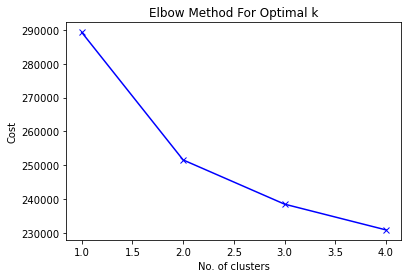

In [87]:
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [88]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(cluster_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9402, cost: 245237.0
Run 1, iteration: 2/100, moves: 235, cost: 245237.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6990, cost: 246239.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 12022, cost: 238263.0
Run 3, iteration: 2/100, moves: 1726, cost: 238032.0
Run 3, iteration: 3/100, moves: 368, cost: 238032.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 7311, cost: 247016.0
Run 4, iteration: 2/100, moves: 2355, cost: 247000.0
Run 4, iteration: 3/100, moves: 50, cost: 247000.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 9226, cost: 244501.0
Run 5, iteration: 2/100, moves: 755, cost: 244501.0
Best run was number 3

array([0, 0, 2, ..., 0, 2, 0], dtype=uint16)

In [89]:
data = cluster_data.copy()

In [90]:
data = cluster_data.copy()
data.insert(0, "Cluster", clusters, True)
data

,Cluster,atk_group,weap_sub,attack_type,suicide,month,country,provstate,year,weap_type,nationality,city
0,0,unknown,pipe bomb,bombing/explosion,0,1,turkey,istanbul,2001,explosives,turkey,istanbul
1,0,devrimici halk kurtulus cephesi (dhkp/c),suicide (carried bodily by human being),bombing/explosion,1,1,turkey,istanbul,2001,explosives,turkey,istanbul
3,2,devrimici halk kurtulus cephesi (dhkp/c),unknown gun type,armed assault,0,1,turkey,istanbul,2001,firearms,turkey,istanbul
6,2,great eastern islamic raiders front (ibda-c),knife or other sharp object,armed assault,0,1,turkey,istanbul,2001,melee,turkey,istanbul
7,2,unknown,unknown gun type,armed assault,0,1,turkey,istanbul,2001,firearms,turkey,istanbul
...,...,...,...,...,...,...,...,...,...,...,...,...
62719,0,al-shabaab,"projectile (rockets, mortars, rpgs, etc.)",bombing/explosion,0,12,somalia,bakool,2017,explosives,international,wajid
62720,2,taliban,unknown gun type,armed assault,0,12,afghanistan,faryab,2017,firearms,afghanistan,kohistan district
62721,0,unknown,unknown explosive type,bombing/explosion,0,12,afghanistan,faryab,2017,explosives,afghanistan,maymana
62722,2,al-shabaab,unknown gun type,armed assault,0,12,somalia,middle shebelle,2017,firearms,somalia,ceelka geelow


In [91]:
data_train, data_validate, data_test = wrangle.split_data(data)
data_train.shape,data_validate.shape, data_test.shape

((24812, 12), (10635, 12), (8862, 12))

In [92]:
data.T

,0,1,3,6,7,8,10,11,12,13,...,62713,62714,62716,62717,62718,62719,62720,62721,62722,62723
Cluster,0,0,2,2,2,0,0,0,0,2,...,1,0,0,0,2,0,2,0,2,0
atk_group,unknown,devrimici halk kurtulus cephesi (dhkp/c),devrimici halk kurtulus cephesi (dhkp/c),great eastern islamic raiders front (ibda-c),unknown,unknown,mujahedin-e khalq (mek),opposition group,unknown,turkish hezbollah,...,islamic state of iraq and the levant (isil),khorasan chapter of the islamic state,al-shabaab,taliban,islamic state of iraq and the levant (isil),al-shabaab,taliban,unknown,al-shabaab,muslim extremists
weap_sub,pipe bomb,suicide (carried bodily by human being),unknown gun type,knife or other sharp object,unknown gun type,remote trigger,"projectile (rockets, mortars, rpgs, etc.)",unknown explosive type,other explosive type,unknown gun type,...,unknown explosive type,vehicle,landmine,remote trigger,unknown gun type,"projectile (rockets, mortars, rpgs, etc.)",unknown gun type,unknown explosive type,unknown gun type,"projectile (rockets, mortars, rpgs, etc.)"
attack_type,bombing/explosion,bombing/explosion,armed assault,armed assault,armed assault,bombing/explosion,bombing/explosion,bombing/explosion,bombing/explosion,armed assault,...,bombing/explosion,bombing/explosion,bombing/explosion,bombing/explosion,armed assault,bombing/explosion,armed assault,bombing/explosion,armed assault,bombing/explosion
suicide,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
month,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
country,turkey,turkey,turkey,turkey,turkey,israel,iran,afghanistan,turkey,turkey,...,iraq,afghanistan,somalia,afghanistan,iraq,somalia,afghanistan,afghanistan,somalia,syria
provstate,istanbul,istanbul,istanbul,istanbul,istanbul,jerusalem,tehran,kabul,mersin,diyarbakir,...,saladin,nangarhar,banaadir,logar,diyala,bakool,faryab,faryab,middle shebelle,lattakia
year,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
weap_type,explosives,explosives,firearms,melee,firearms,explosives,explosives,explosives,explosives,firearms,...,explosives,explosives,explosives,explosives,firearms,explosives,firearms,explosives,firearms,explosives


In [93]:
data.T

,0,1,3,6,7,8,10,11,12,13,...,62713,62714,62716,62717,62718,62719,62720,62721,62722,62723
Cluster,0,0,2,2,2,0,0,0,0,2,...,1,0,0,0,2,0,2,0,2,0
atk_group,unknown,devrimici halk kurtulus cephesi (dhkp/c),devrimici halk kurtulus cephesi (dhkp/c),great eastern islamic raiders front (ibda-c),unknown,unknown,mujahedin-e khalq (mek),opposition group,unknown,turkish hezbollah,...,islamic state of iraq and the levant (isil),khorasan chapter of the islamic state,al-shabaab,taliban,islamic state of iraq and the levant (isil),al-shabaab,taliban,unknown,al-shabaab,muslim extremists
weap_sub,pipe bomb,suicide (carried bodily by human being),unknown gun type,knife or other sharp object,unknown gun type,remote trigger,"projectile (rockets, mortars, rpgs, etc.)",unknown explosive type,other explosive type,unknown gun type,...,unknown explosive type,vehicle,landmine,remote trigger,unknown gun type,"projectile (rockets, mortars, rpgs, etc.)",unknown gun type,unknown explosive type,unknown gun type,"projectile (rockets, mortars, rpgs, etc.)"
attack_type,bombing/explosion,bombing/explosion,armed assault,armed assault,armed assault,bombing/explosion,bombing/explosion,bombing/explosion,bombing/explosion,armed assault,...,bombing/explosion,bombing/explosion,bombing/explosion,bombing/explosion,armed assault,bombing/explosion,armed assault,bombing/explosion,armed assault,bombing/explosion
suicide,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
month,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
country,turkey,turkey,turkey,turkey,turkey,israel,iran,afghanistan,turkey,turkey,...,iraq,afghanistan,somalia,afghanistan,iraq,somalia,afghanistan,afghanistan,somalia,syria
provstate,istanbul,istanbul,istanbul,istanbul,istanbul,jerusalem,tehran,kabul,mersin,diyarbakir,...,saladin,nangarhar,banaadir,logar,diyala,bakool,faryab,faryab,middle shebelle,lattakia
year,2001,2001,2001,2001,2001,2001,2001,2001,2001,2001,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
weap_type,explosives,explosives,firearms,melee,firearms,explosives,explosives,explosives,explosives,firearms,...,explosives,explosives,explosives,explosives,firearms,explosives,firearms,explosives,firearms,explosives


In [102]:
dummy_df = pd.get_dummies(data[['Cluster',
                               'provstate',
                               'city',
                              'nationality',
                              'month',
                              'attack_type',
                              'atk_group', 
                              'weap_type',
                              'weap_sub']], dummy_na=False, drop_first=[True, True])
df_trial2 = pd.concat([df3, dummy_df], axis = 1)

In [103]:
number = pd.concat([df3, data], axis=1)

In [104]:
df_trial2

,target,Cluster,month,provstate_adiyaman,provstate_agri,provstate_ahmadi,provstate_al anbar,provstate_al hasakah,provstate_al qadisiyah,provstate_al qahirah (cairo),...,weap_sub_remote trigger,weap_sub_rifle/shotgun (non-automatic),weap_sub_rope or other strangling device,weap_sub_sticky bomb,weap_sub_suicide (carried bodily by human being),weap_sub_time fuse,weap_sub_unknown explosive type,weap_sub_unknown gun type,weap_sub_unknown weapon type,weap_sub_vehicle
0,private citizens & property,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,police,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,police,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,other,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,police,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62719,military,0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62720,other,2,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
62721,other,0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
62722,military,2,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [105]:
trial_train2, trial_validate2, trial_test2 = wrangle.split_data(df_trial2)
trial_train2.shape,trial_validate2.shape, trial_test2.shape

((24812, 7574), (10635, 7574), (8862, 7574))

In [106]:
X_train_trial2 = trial_train2.drop(columns=["target"])
y_train_trial2 = trial_train2.target

X_validate_trial2 = trial_validate2.drop(columns=["target"])
y_validate_trial2 = trial_validate2.target

X_test_trial2 = trial_test2.drop(columns=["target"])
y_test_trial2 = trial_test2.target

In [107]:
metrics = []

for i in range(1, 30):

    tree = DecisionTreeClassifier(max_depth=i, random_state=17)


    tree = tree.fit(X_train_trial2, y_train_trial2)


    in_sample_accuracy = tree.score(X_train_trial2, y_train_trial2)
    
    out_of_sample_accuracy = tree.score(X_validate_trial2, y_validate_trial2)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
dt_df = pd.DataFrame(metrics)
dt_df["difference"] = dt_df.train_accuracy - dt_df.validate_accuracy
dt_df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.300177,0.287541,0.012636
1,2,0.320329,0.305783,0.014546
2,3,0.345438,0.330606,0.014831
3,4,0.373529,0.359379,0.014150
4,5,0.379212,0.364175,0.015037
5,6,0.383242,0.366808,0.016434
6,7,0.396461,0.378467,0.017994
7,8,0.407787,0.385708,0.022079
8,9,0.424432,0.397555,0.026876
9,10,0.437691,0.405548,0.032144


In [108]:
metrics = []

for i in range(1, 25):

    tree = RandomForestClassifier(bootstrap = True, 
                                  class_weight = None,
                                  criterion = 'gini', 
                                  min_samples_leaf = 3, 
                                  n_estimators = 150,
                                  max_depth=i,
                                  random_state=17)


    tree = tree.fit(X_train_trial2, y_train_trial2)


    in_sample_accuracy = tree.score(X_train_trial2, y_train_trial2)
    
    out_of_sample_accuracy = tree.score(X_validate_trial2, y_validate_trial2)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
rf_df_trial = pd.DataFrame(metrics)
rf_df_trial["difference"] = rf_df_trial.train_accuracy - rf_df_trial.validate_accuracy
rf_df_trial

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.277406,0.266479,0.010927
1,2,0.277406,0.266479,0.010927
2,3,0.278011,0.267419,0.010592
3,4,0.287522,0.277292,0.010230
4,5,0.299694,0.286883,0.012811
5,6,0.313840,0.299013,0.014827
6,7,0.332259,0.319699,0.012559
7,8,0.340883,0.328162,0.012722
8,9,0.350919,0.335308,0.015611
9,10,0.368733,0.353644,0.015089
